In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import PIL
import PIL.Image
import tensorflow as tf
import glob
import pathlib
from pathlib import Path

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD

In [242]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [243]:
# Directory path
train_data_dir = 'chest_xray/chest_xray/train/'
val_data_dir = 'chest_xray/chest_xray/val/'
test_data_dir = 'chest_xray/chest_xray/test/'


# getting the testing data
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=600)

# getting the validation set
val_generator = ImageDataGenerator().flow_from_directory(
        val_data_dir, 
        target_size=(64, 64), batch_size=16)

# Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator(horizontal_flip=True).flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=5200)


Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [244]:
# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [212]:
train_images[0].shape

(64, 64, 3)

In [222]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

In [ ]:
#trying to augment old images to be different oritentations of these
augmented_train_images = np.ndarray(shape=(64,64,3))


for img in train_images:
    data = img_to_array(img)
    samples = expand_dims(data,0)
    datagen = ImageDataGenerator(horizontal_flip=True)
    iterator = datagen.flow(samples,batch_size=1)
    for i in range(9):
        plt.subplot()
        batch = iterator.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
        plt.show()
        break

In [229]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers


In [317]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0),
])

In [306]:
train_labels[0]

array([0., 1.], dtype=float32)

In [307]:
train_generator.class_indices['NORMAL']

0

0


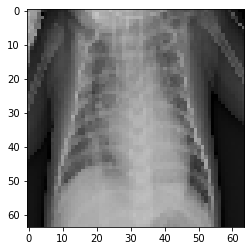

In [318]:
image = train_images[0]
label = train_labels[0]
print(train_generator.labels[0])
plt.imshow(image);
#plt.title()

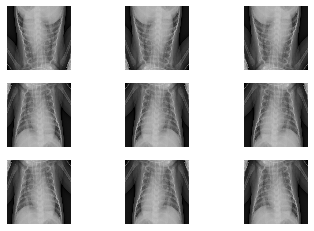

In [319]:
image = tf.expand_dims(image,0)
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

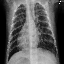

In [217]:
array_to_img(train_images[0])

In [216]:
train_labels[0]

array([0., 1.], dtype=float32)

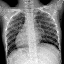

In [84]:
array_to_img(train_images[1])

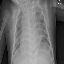

In [85]:
array_to_img(train_images[100])

In [245]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))
print(np.shape(val_images))
print(np.shape(val_labels))

(5200, 64, 64, 3)
(5200, 2)
(600, 64, 64, 3)
(600, 2)
(16, 64, 64, 3)
(16, 2)


In [246]:
X_train = train_images.reshape(5200,12288)
X_test = test_images.reshape(600,12288)
X_val = val_images.reshape(16,12288)

In [247]:
test_labels.shape

(600, 2)

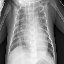

In [248]:
array_to_img(train_images[0])

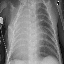

In [249]:
array_to_img(train_images[5])

In [250]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [251]:
train_labels.T[[1]][0]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [252]:
y_train

array([1., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [253]:
y_train = train_labels.T[[1]][0]
y_test = test_labels.T[[1]][0]
y_val = val_labels.T[[1]][0]

In [254]:
pd.DataFrame(y_train)[0].value_counts()

1.0    3863
0.0    1337
Name: 0, dtype: int64

In [255]:
print(X_train.shape)
print(y_train.shape)

(5200, 12288)
(5200,)


### base model testing

In [256]:
batch_size = 10
num_classes = 2
epochs = 6

In [257]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [258]:
print(X_train.shape)
print(y_train.shape)

(5200, 12288)
(5200, 2)


### standardizing the image values 
This is done so that instead of a value between 0 and 255 we have a value between 0-1 reprenting how much color is there

In [259]:
X_train /= 255
X_test /= 255
X_val /= 255

In [260]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [214]:
# model structure
model = Sequential()

# first hidden layer
# 12288 = 64x64x3 = size of image
model.add(Dense(50,activation='relu',input_shape=(12288,)))

# second hidden layer
model.add(Dense(50,activation='relu'))


# output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(X_val,y_val))

score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 50)                614450    
_________________________________________________________________
dense_169 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_170 (Dense)            (None, 2)                 102       
Total params: 617,102
Trainable params: 617,102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
500/500 [==============================] - 1s 2ms/step - loss: 0.3639 - accuracy: 0.8540 - val_loss: 0.6267 - val_accuracy: 0.6875
Epoch 2/6
500/500 [==============================] - 1s 2ms/step - loss: 0.2066 - accuracy: 0.9210 - val_loss: 0.3828 - val_accuracy: 0.8125
Epoch 3/6
500/500 [==============================] - 1s 2ms/step - loss: 0.1716 - accuracy: 0.9

# CNN

In [26]:
train_images.shape

(5000, 64, 64, 3)

In [27]:
y_train.shape

(5000, 2)

In [261]:
from tensorflow.keras import datasets, layers, models

In [327]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu',input_shape=(64,64,3)))
#model.add(layers.Conv2D(64, (3,3), activation='relu',input_shape=(64,64,3))
#model.add(Dropout(0.2))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.SeparableConv2D(64,(3,3),activation='relu'))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
#model.add(layers.Conv2D(64,(3,3),activation='relu'))
#model.add(Dropout(0.1))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
#model.add(Dropout(0.1))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
#model.add(Dropout(0.1))
model.add(layers.MaxPool2D((2,2)))

In [328]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(2, activation='sigmoid'))

In [329]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, y_train, epochs=5,validation_data=(val_images,y_val))

Epoch 1/5
163/163 [==============================] - 16s 98ms/step - loss: 0.6062 - accuracy: 0.7408 - val_loss: 0.7360 - val_accuracy: 0.5000
Epoch 2/5
163/163 [==============================] - 17s 102ms/step - loss: 0.5792 - accuracy: 0.7429 - val_loss: 0.7976 - val_accuracy: 0.5000
Epoch 3/5
163/163 [==============================] - 16s 99ms/step - loss: 0.5040 - accuracy: 0.7671 - val_loss: 0.6610 - val_accuracy: 0.6250
Epoch 4/5
163/163 [==============================] - 16s 98ms/step - loss: 0.3153 - accuracy: 0.8665 - val_loss: 0.6272 - val_accuracy: 0.8125
Epoch 5/5
163/163 [==============================] - 16s 96ms/step - loss: 0.2080 - accuracy: 0.9198 - val_loss: 0.7556 - val_accuracy: 0.6250


In [330]:
score = model.evaluate(test_images,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5137367248535156
Test accuracy: 0.7900000214576721


### trying alex net

In [320]:
model = models.Sequential()


model.add(layers.Conv2D(96, (4,4), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(256, (11,11), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(384, (3,3), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(384, (3,3), activation='relu',input_shape=(64,64,3),padding='same'))

model.add(layers.Conv2D(256, (3,3), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(1000, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(2, activation='sigmoid'))

In [321]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, y_train, epochs=5,validation_data=(val_images,y_val))

Epoch 1/5
  3/163 [..............................] - ETA: 3:06 - loss: 2.1565 - accuracy: 0.6667

KeyboardInterrupt: 

In [204]:
score = model.evaluate(test_images,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.9056614637374878
Test accuracy: 0.6766666769981384


In [154]:
train_images.shape

(5200, 64, 64, 3)

In [206]:
y_train.shape

(5000, 2)

In [278]:
from keras.applications import inception_v3
from keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from keras.models import Model


In [203]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new = imagenet.output
new_model = models.Sequential()
new_model.add(imagenet)
new_model.add(GlobalAveragePooling2D())
new_model.add(Dense(1024,activation='relu'))
new_model.add(Dense(1024,activation='relu'))
new_model.add(Dense(512,activation='relu'))
new_model.add(Dense(2,activation='sigmoid'))

In [204]:
new_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

new_model.fit(train_images,y_train,epochs=10,batch_size=50)

Epoch 1/10


ValueError: in user code:

    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/layers/convolutional.py:247 call
        outputs = self._convolution_op(inputs, self.kernel)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py:1017 convolution_v2
        name=name)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py:1147 convolution_internal
        name=name)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py:2591 _conv2d_expanded_batch
        name=name)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py:979 conv2d
        data_format=data_format, dilations=dilations, name=name)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/func_graph.py:593 _create_op_internal
        compute_device)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:3485 _create_op_internal
        op_def=op_def)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:1975 __init__
        control_input_ops, op_def)
    /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node sequential_38/inception_v3/conv2d_373/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true](sequential_38/inception_v3/activation_356/Relu, sequential_38/inception_v3/conv2d_373/Conv2D/ReadVariableOp)' with input shapes: [50,2,2,192], [3,3,192,192].
